# Asthma ED Visits in CA Analysis


## About the Data

`Asthma ED Visit Rates by ZIP` is a dataset that contains counts and rates of Asthma related emergency department visits in the State of California. This data was used to search for any cause and effect relationship between Income and Asthma ED Visit counts, relationsthip between improvement rate of Asthma ED Visit and Income, geographical relations, and others. 

> **DATASET**

>[Asthma ED Visit Rates by ZIP](https://data.world/health)

>[CA Personal Income by County](https://data.ftb.ca.gov/stories/s/2it8-edzu#california-median-income-by-county)


## Objectives
* To review the data to look for prevalence of Asthma and geography
* To review which county had the most Asthma related ED visits
* To assess the improvement rate by county and compare with increase rate of Income to look any prevalence


## Data Cleaning

Data was cleaned on Excel for:
* Duplicates
* Trip whitespaces
* Remove Null data
* Typing errors
* Split Zipcode, Longitude/Latitude into 2 columns

Data was organized on Excel, BigQuery, and R 

## Prevalence of Asthma and Geography
> **Creating a table with average number of Asthma related visits by Counties of CA**

Using R:

```{r}
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("dplyr")
library(tidyverse)
library(ggplot2)
library(dplyr)
library(forcats)
```

```{r}
ED_rate<- read.csv("Asthma_ED_visit.csv")
view(ED_rate)
```

```{r}
ED_filter<-ED_rate %>% filter(Age.Group == "All Ages") %>% group_by(County) %>% arrange(Year)
```

```{r}
ED_Count<-ED_filter %>% group_by(County) %>% summarize(mean_visits=mean(round(Number.of.Visits),1)) %>% arrange(mean_visits)
```

```{r name-of-chunk, fig.width=20, fig.height=4}
ggplot(data=ED_Count)+
  geom_col(width=0.5,
           aes(x=reorder(County,-mean_visits),y=mean_visits),
           fill="skyblue",
           color="darkblue")+
  labs(x="County",y="Avg Asthma ED Visit Counts")+
  theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))+labs(title="Average Number of Asthma Related ED Visits in CA")+
  theme(plot.title=element_text(hjust=0.5))```

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1678131632000' style='position: relative'><noscript><a href='#'><img alt='Average Asthma ED Visits of CA ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Av&#47;AverageofAsthmaEDVisitsinCA&#47;AverageAsthmaEDVisits&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AverageofAsthmaEDVisitsinCA&#47;AverageAsthmaEDVisits' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Av&#47;AverageofAsthmaEDVisitsinCA&#47;AverageAsthmaEDVisits&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678131632000');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Map shows no prevalence between Asthma and Geography.

## County that had the most Asthma related ED visits


Using R:

```{r name-of-chunk, fig.width=20, fig.height=4}
ggplot(data=ED_Count)+
  geom_col(width=0.5,
           aes(x=reorder(County,-mean_visits),y=mean_visits),
           fill="skyblue",
           color="darkblue")+
  labs(x="County",y="Avg Asthma ED Visit Counts")+
  theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))+labs(title="Average Number of Asthma Related ED Visits in CA")+
  theme(plot.title=element_text(hjust=0.5))```

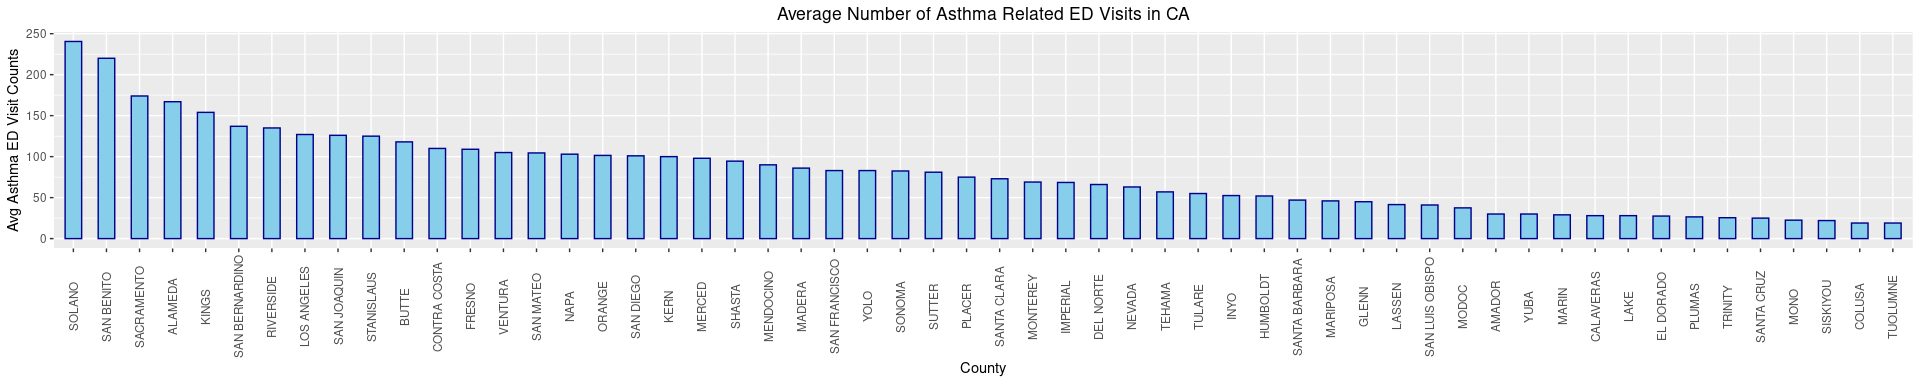

>**Top 10 Counties with Highest Average ED Visits related to Asthma are:**

1. Solano
2. San Benito
3. Sacramento
4. Alameda
5. Kings
6. San Bernardino
7. Riverside
8. Los Angeles
9. San Joaquin
10. Stanislaus


## Improvement Rate VS Increase Rate



>**Creating a bar graph that shows the overal comparison of Asthma ED Visit counts between 2009 and 2012 by County**

Using BigQuery:

  SELECT 

  County,

  `coursera-project-363419.Asthma.2009_Visits`.total_visits AS total_visits_2009,

  `coursera-project-363419.Asthma.2012_Visits`.total_visits AS total_visits_2012

  FROM `coursera-project-363419.Asthma.2009_Visits`

  JOIN `coursera-project-363419.Asthma.2012_Visits`

    USING (County)

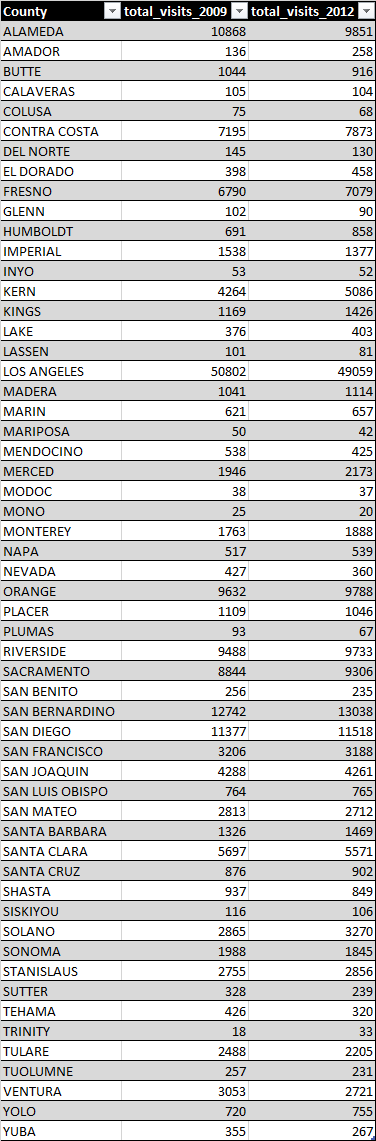

Using Excel:

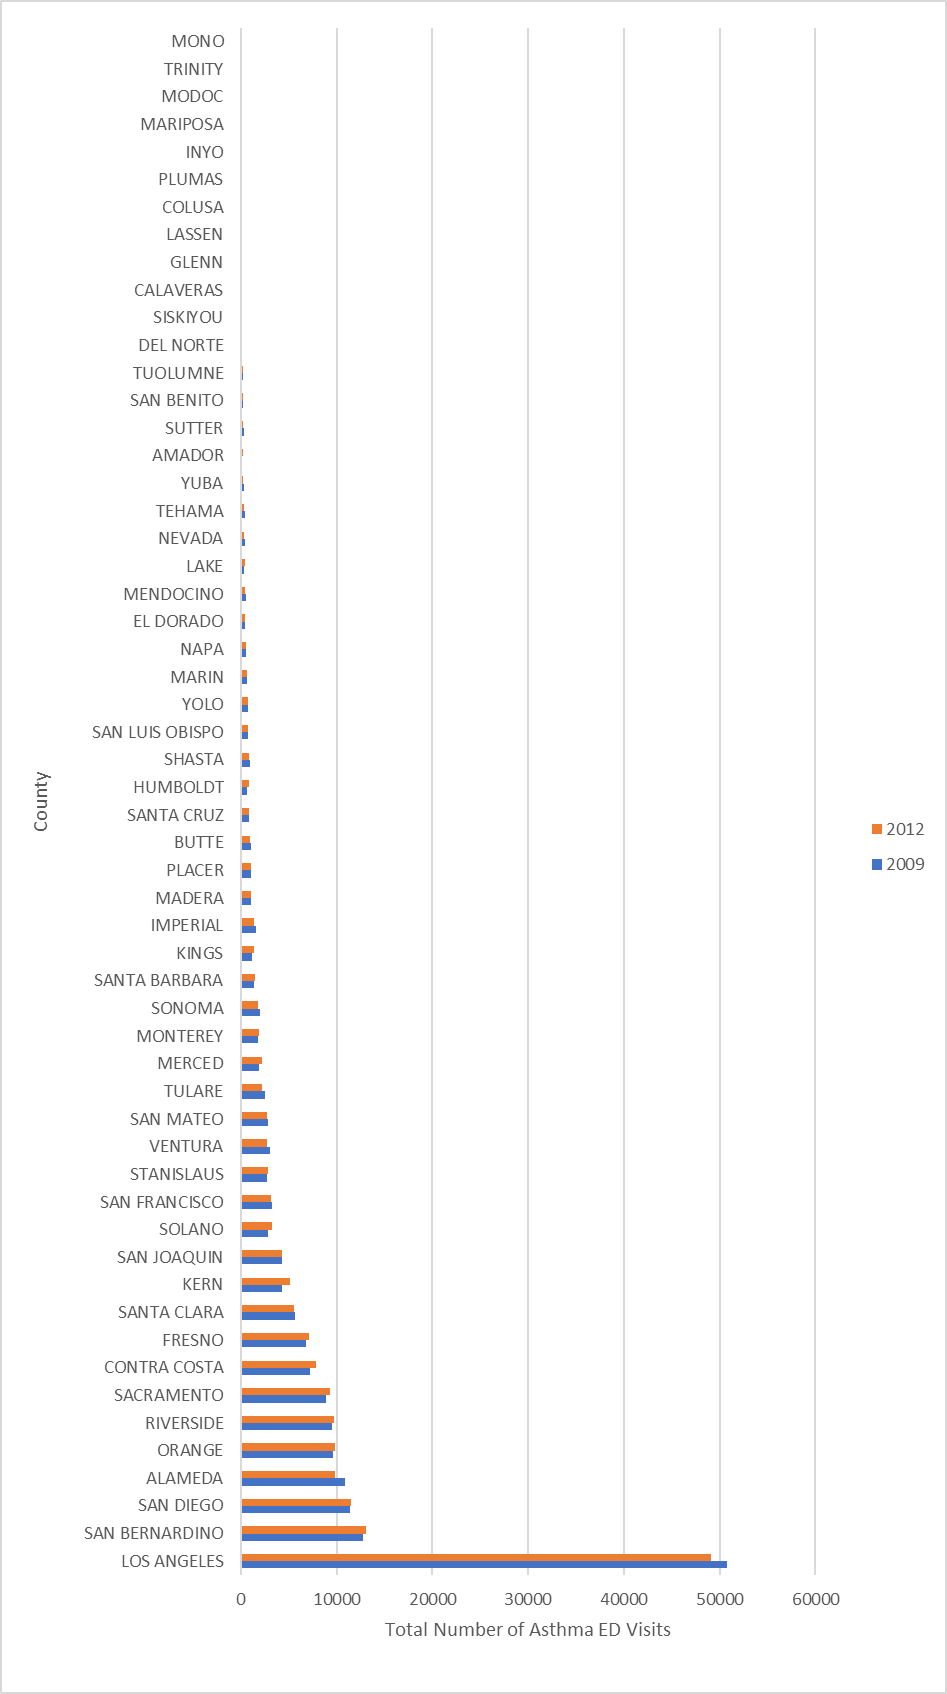

>**Creating a table with Improvement rate of Asthma ED Visits by County of CA**

Using BigQuery,

    SELECT

    County,

    ROUND(((total_visits_2012-total_visits_2009)/total_visits_2009)*100,2) AS Improvement_rate

    FROM `coursera-project-363419.Asthma.combined_ED_visits` 

    ORDER BY Improvement_rate

Table was exported and Bar graph was created on Excel
* Negative Improvement Rate = Asthma related ED visits in 2012 has decreased than 2009 (Improved)
* Positive Improvement Rate = Asthma related ED visits in 2012 has increased than 2009 (Not Improved)

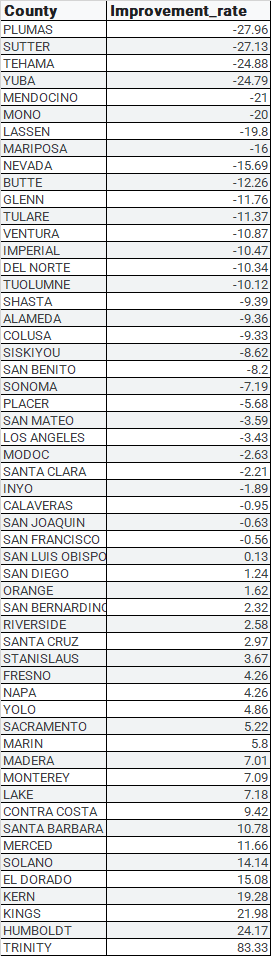

Orange Color= Improved


Teal Color= Not Improved

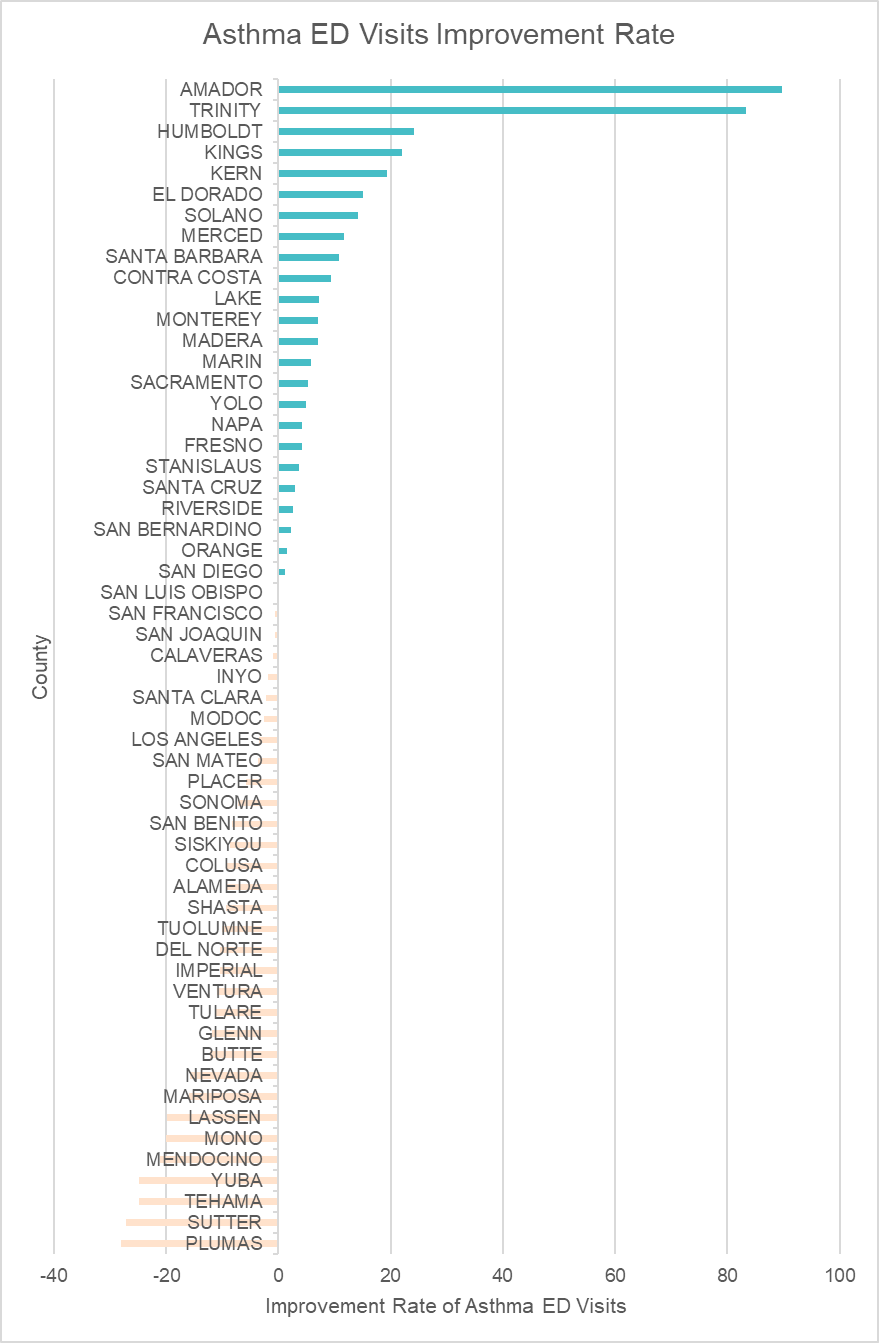

>**Creating a table with Increase rate of Median Income by County of CA**

Using BigQuery:

    SELECT  

    County,

    ROUND(((Median_Income_2012-Median_Income_2009)/Median_Income_2009)*100,2) AS Increase_rate

    FROM `coursera-project-363419.Income.CA_Income` 
    
    Order By Increase_rate

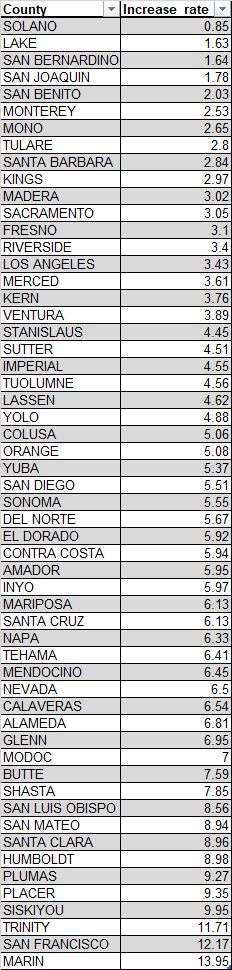

Orange Color= Improved


Teal Color= Not Improved

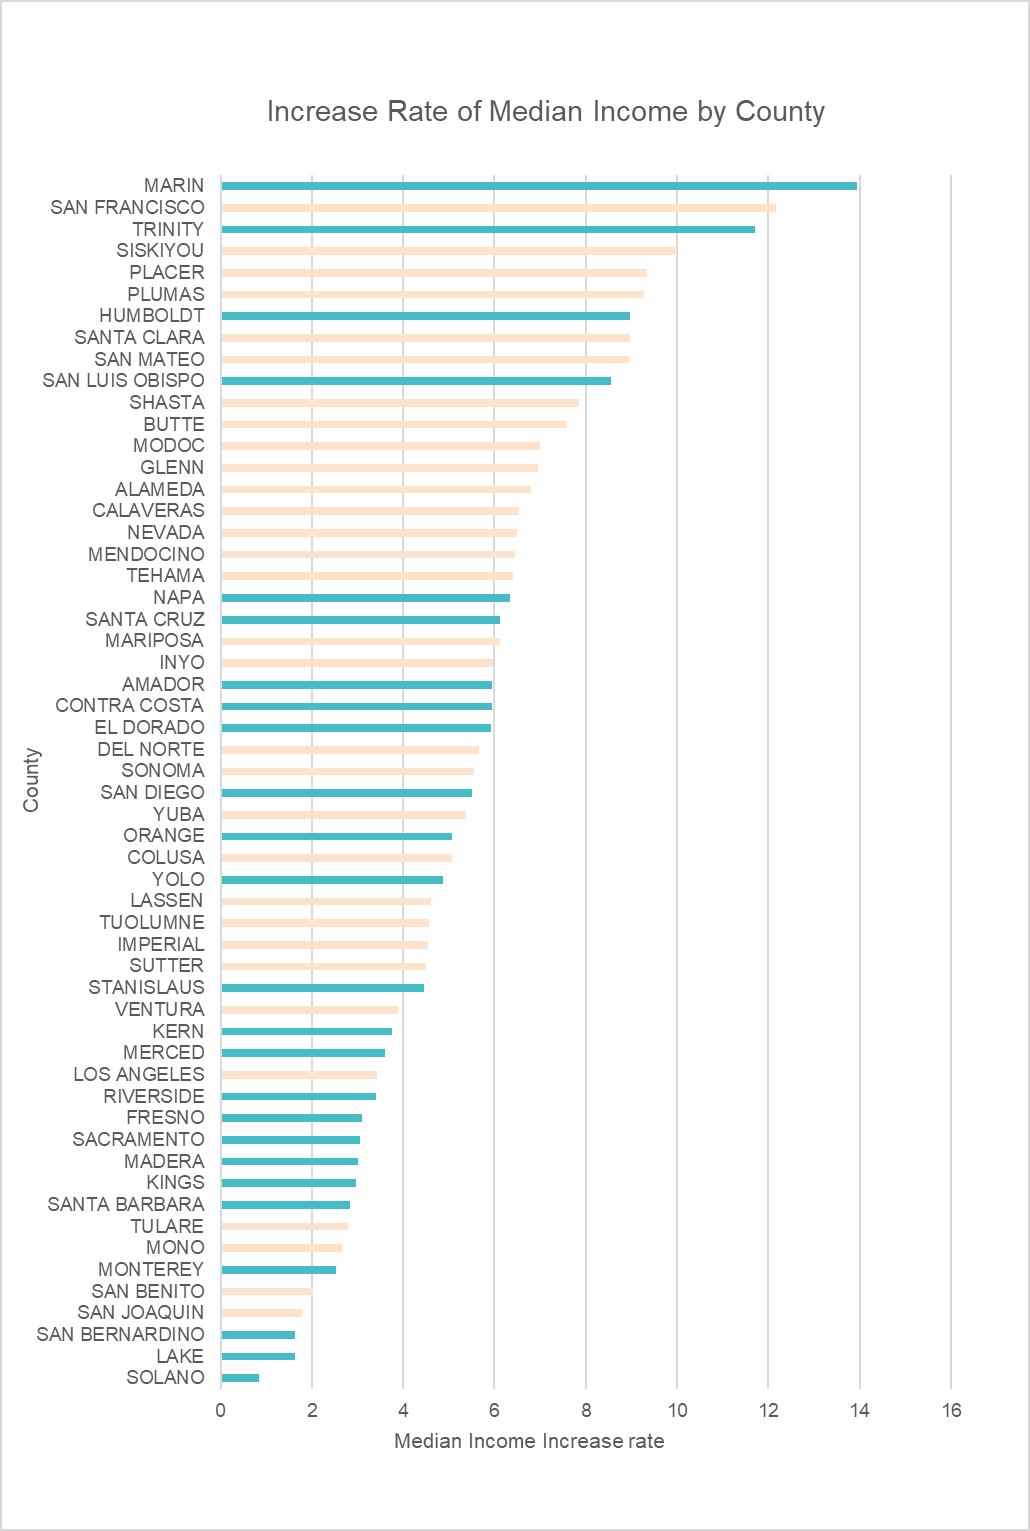

Bar graphs and tables suggests no cause and effect relationship nor correlation inbetween increase in income and Asthma related ED Visit